## Visualization


Analyzing the correlation between numerical variables and the target variable is_canceled to identify which features are most strongly associated with booking cancellations.

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


sb.set()


data = pd.read_csv('cleaned_hotel_bookings.csv', dtype={'agent': str, 'company': str})


In [276]:
correlation = data.corr(numeric_only=True)['is_canceled'].sort_values(ascending=False)
print(correlation)

is_canceled                       1.000000
lead_time                         0.286852
previous_cancellations            0.113761
adr                               0.063639
adults                            0.057926
days_in_waiting_list              0.057208
total_guests                      0.046023
stays_in_week_nights              0.022985
stay_duration                     0.017533
children                          0.003319
stays_in_weekend_nights           0.000921
babies                           -0.030198
previous_bookings_not_canceled   -0.057626
is_repeated_guest                -0.076492
booking_changes                  -0.139372
required_car_parking_spaces      -0.190743
total_of_special_requests        -0.224096
Name: is_canceled, dtype: float64


According to the heatmap below, we observe that 'lead_time' and 'total_of_special_requests' have the strongest correlation with 'is_canceled'.

<Axes: >

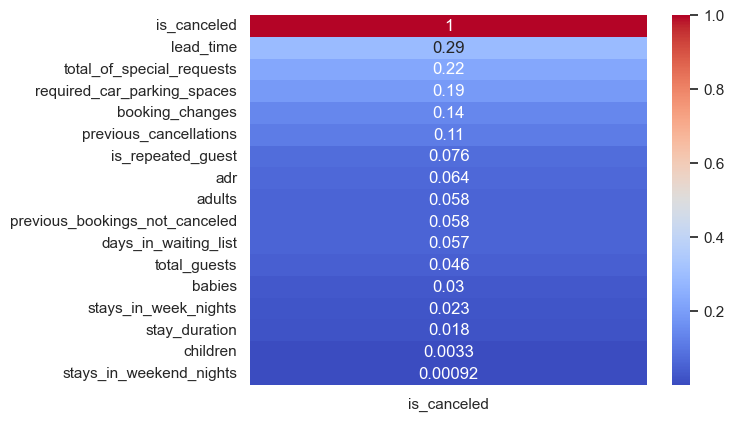

In [239]:
corr = data.corr(numeric_only=True)  

sb.heatmap(corr[['is_canceled']].abs().sort_values(by='is_canceled', ascending=False), annot=True, cmap='coolwarm')


Next, we visualize the distribution of the numerical variables.

In [242]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('is_canceled')
correlations = data[numerical_cols].corrwith(data['is_canceled']).abs()
sorted_numerical_cols = correlations.sort_values(ascending=False).index.tolist()




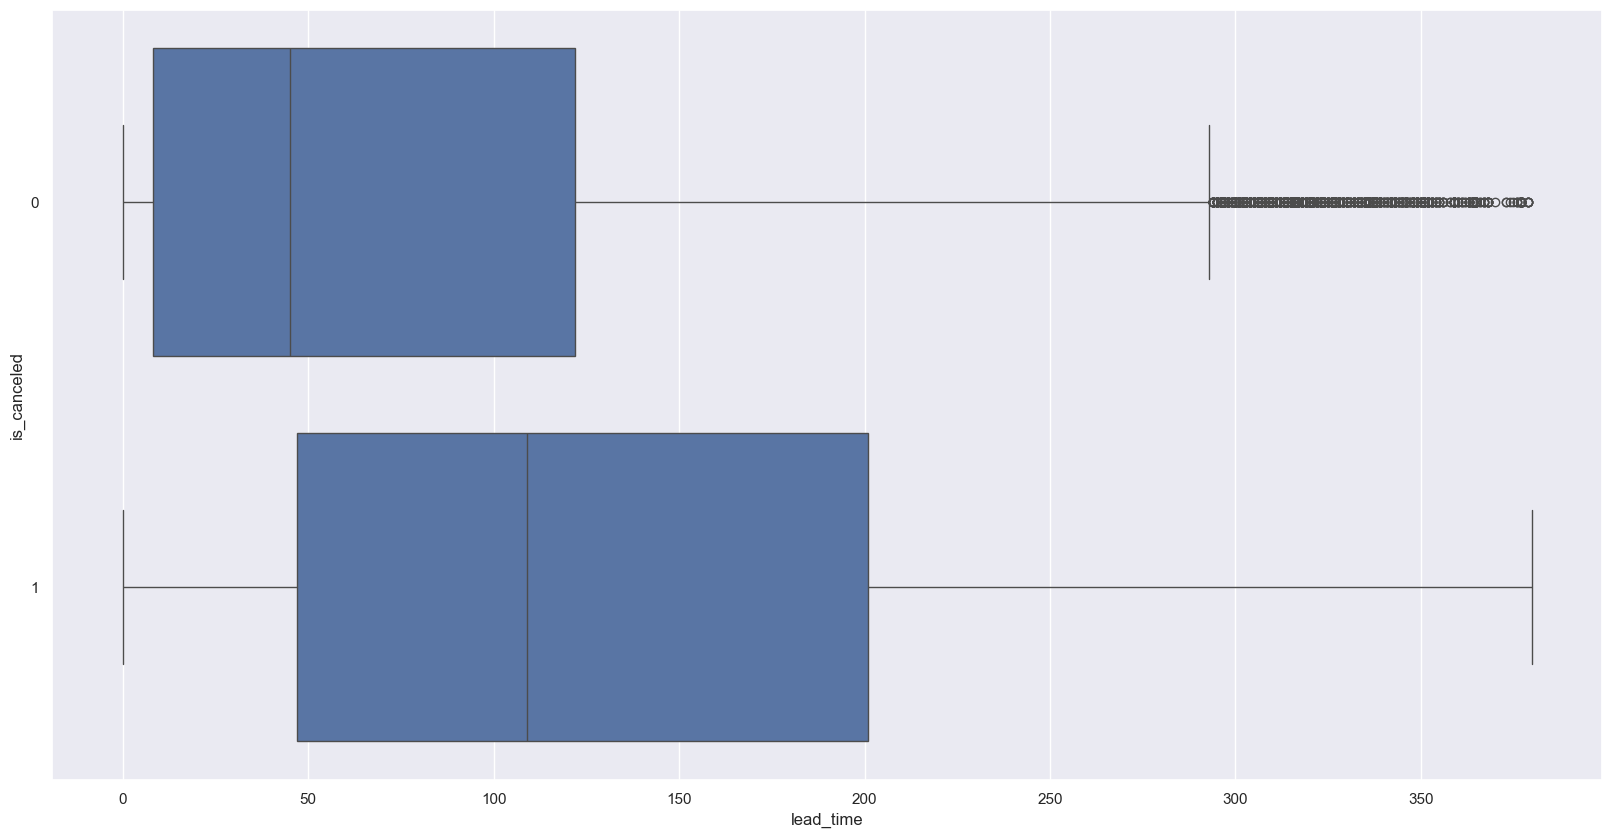

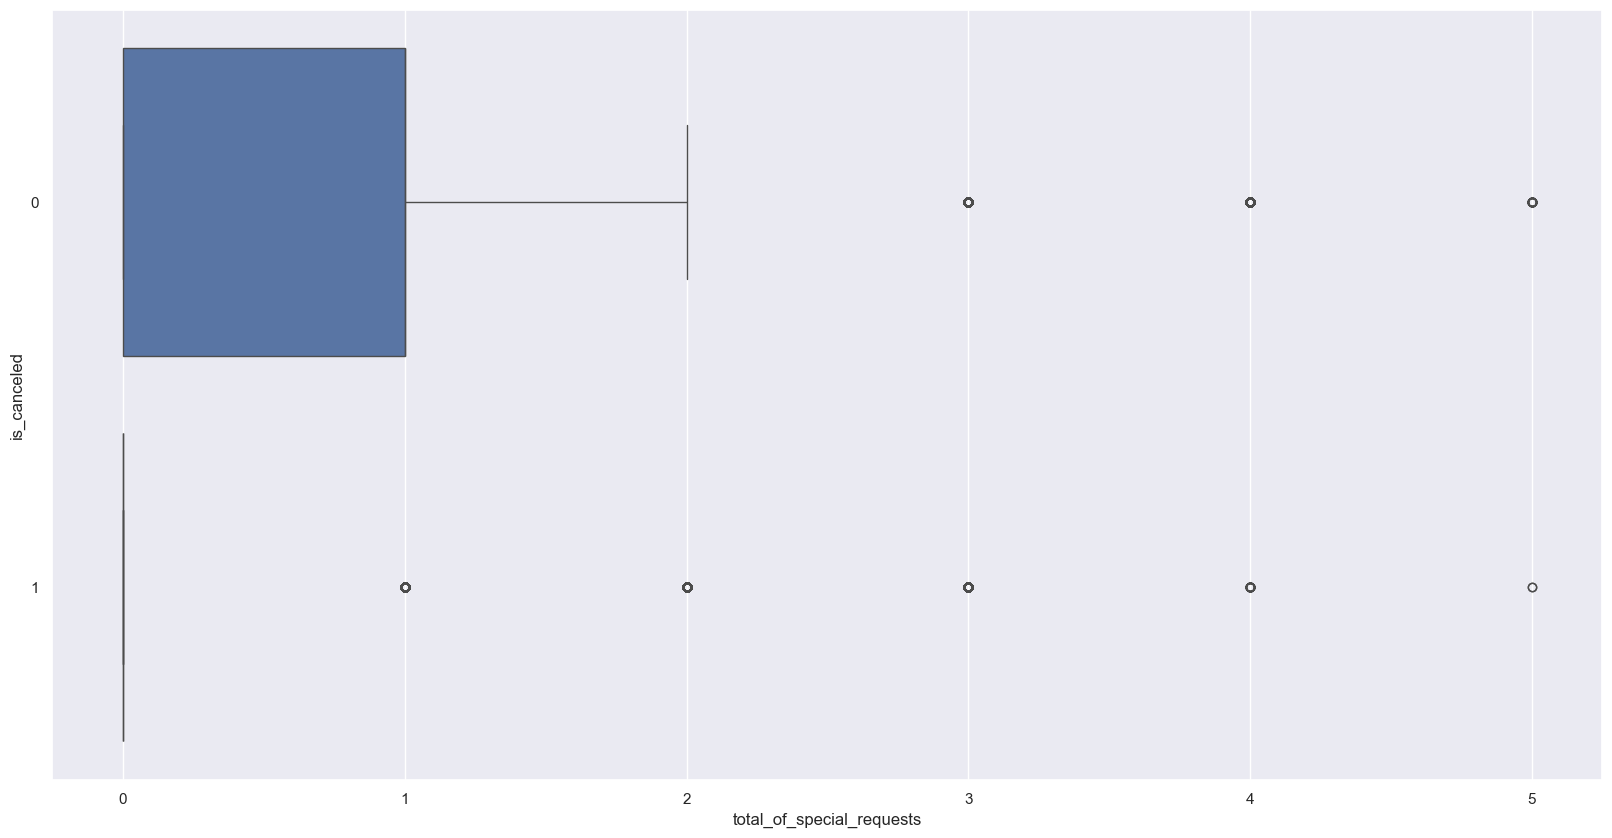

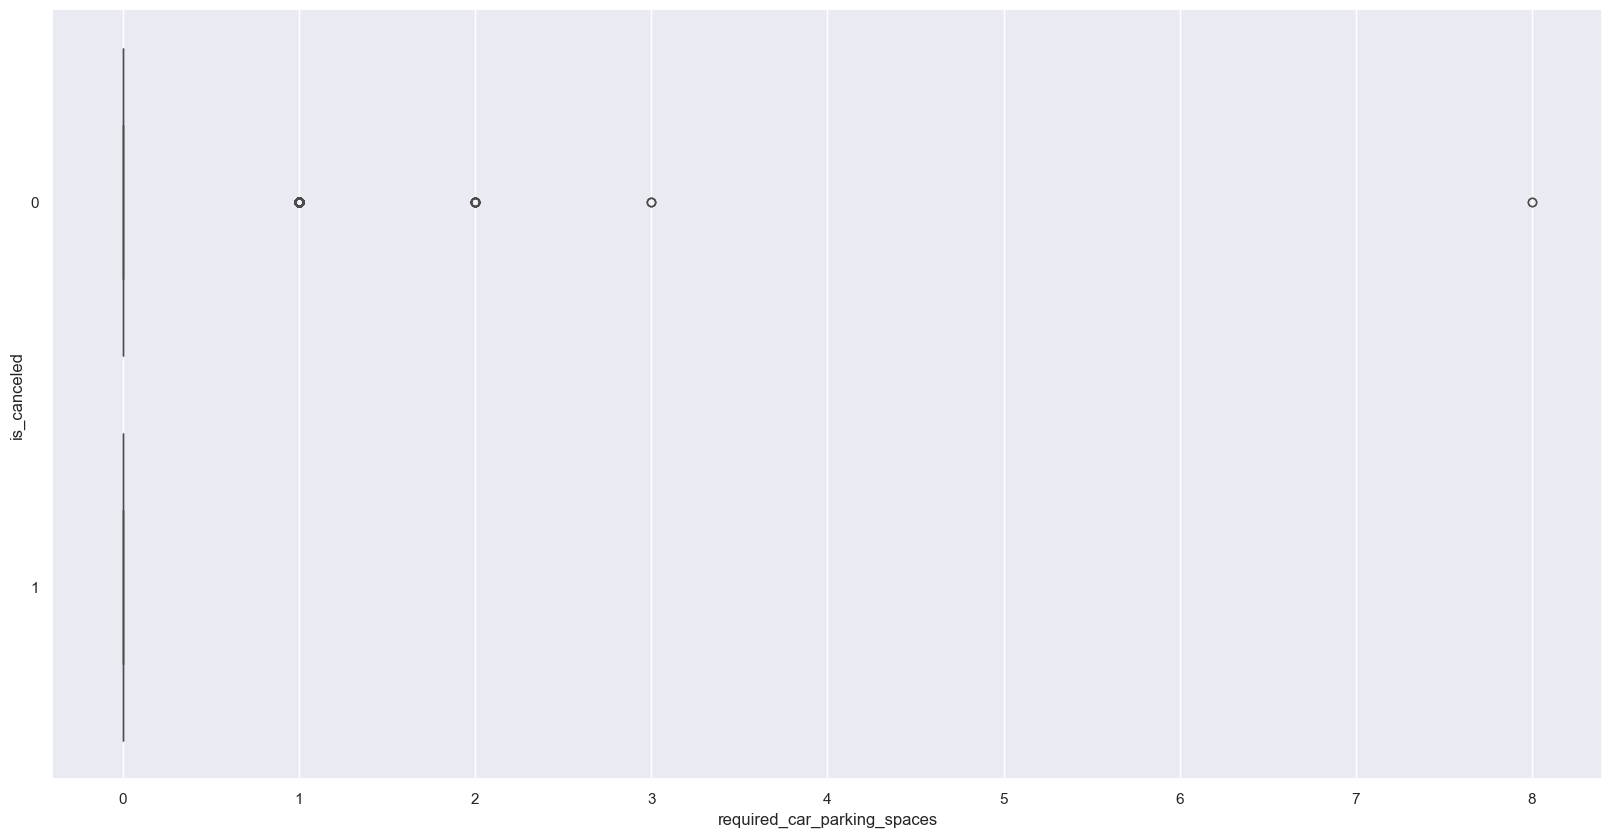

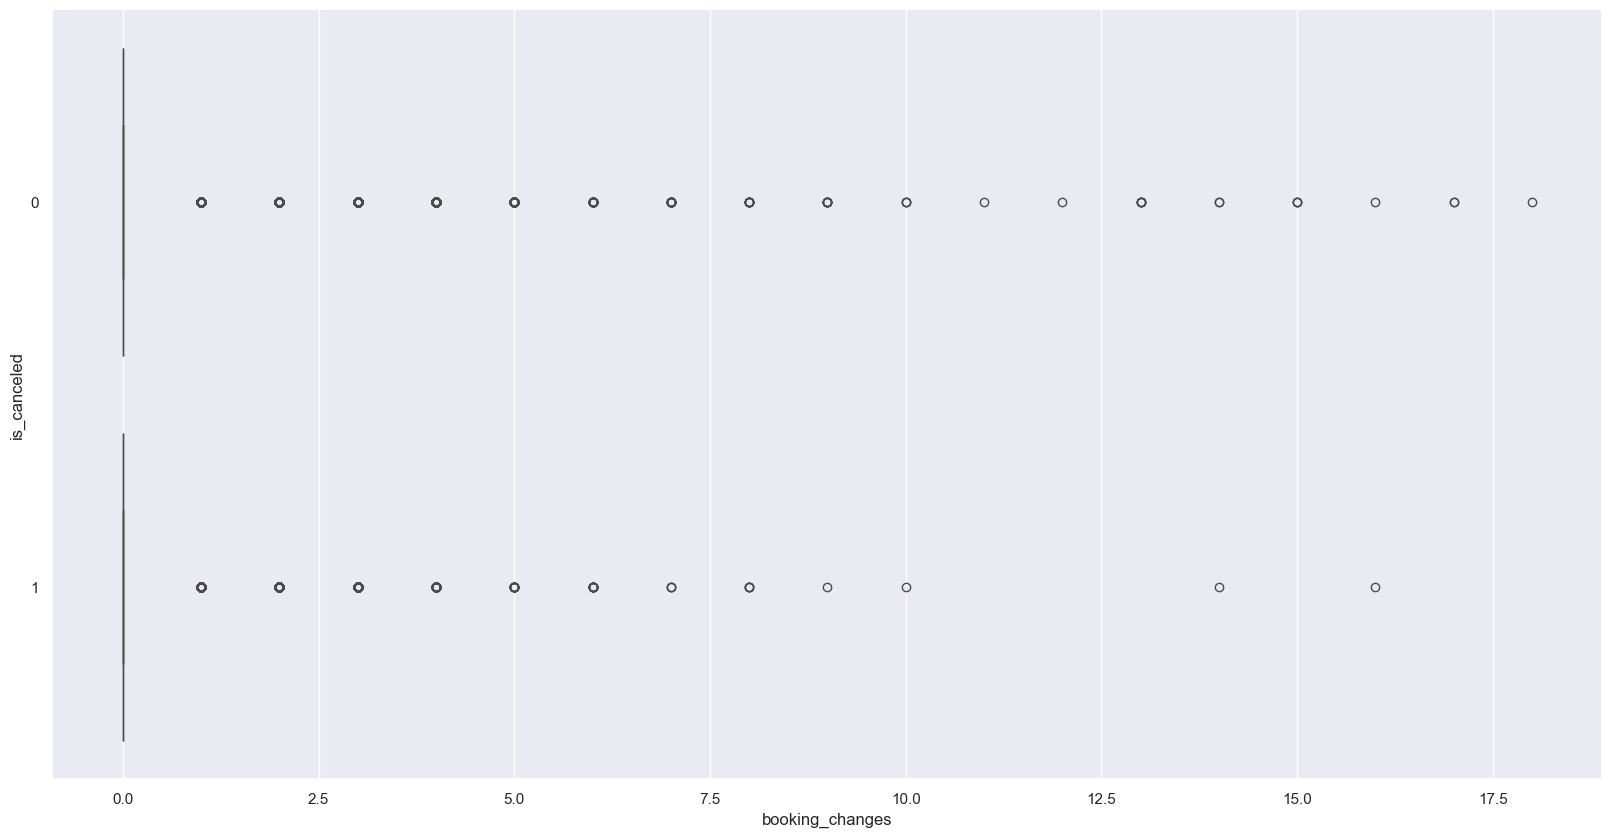

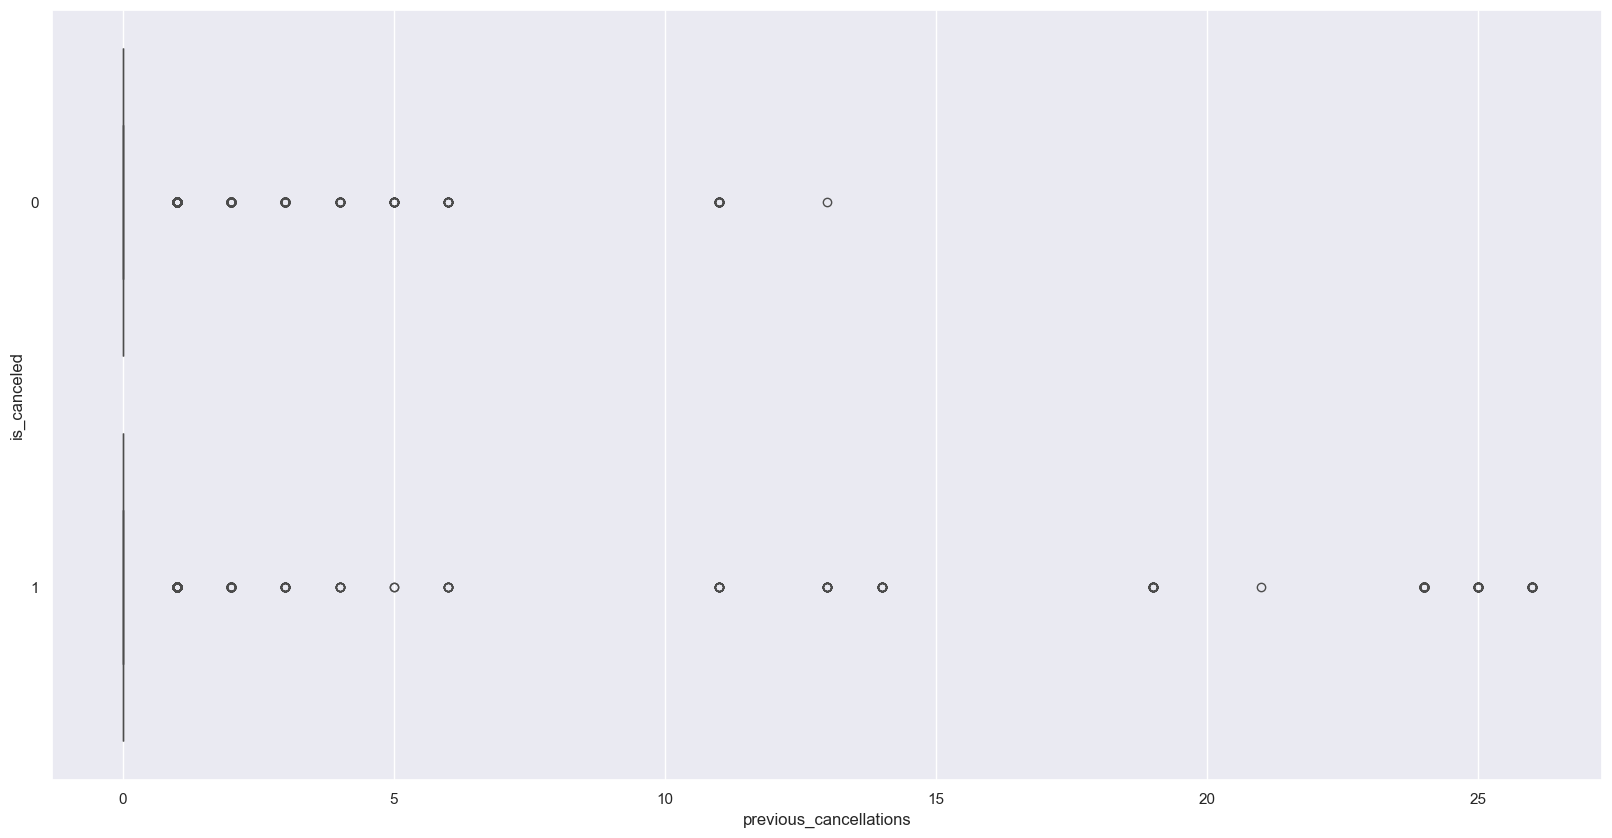

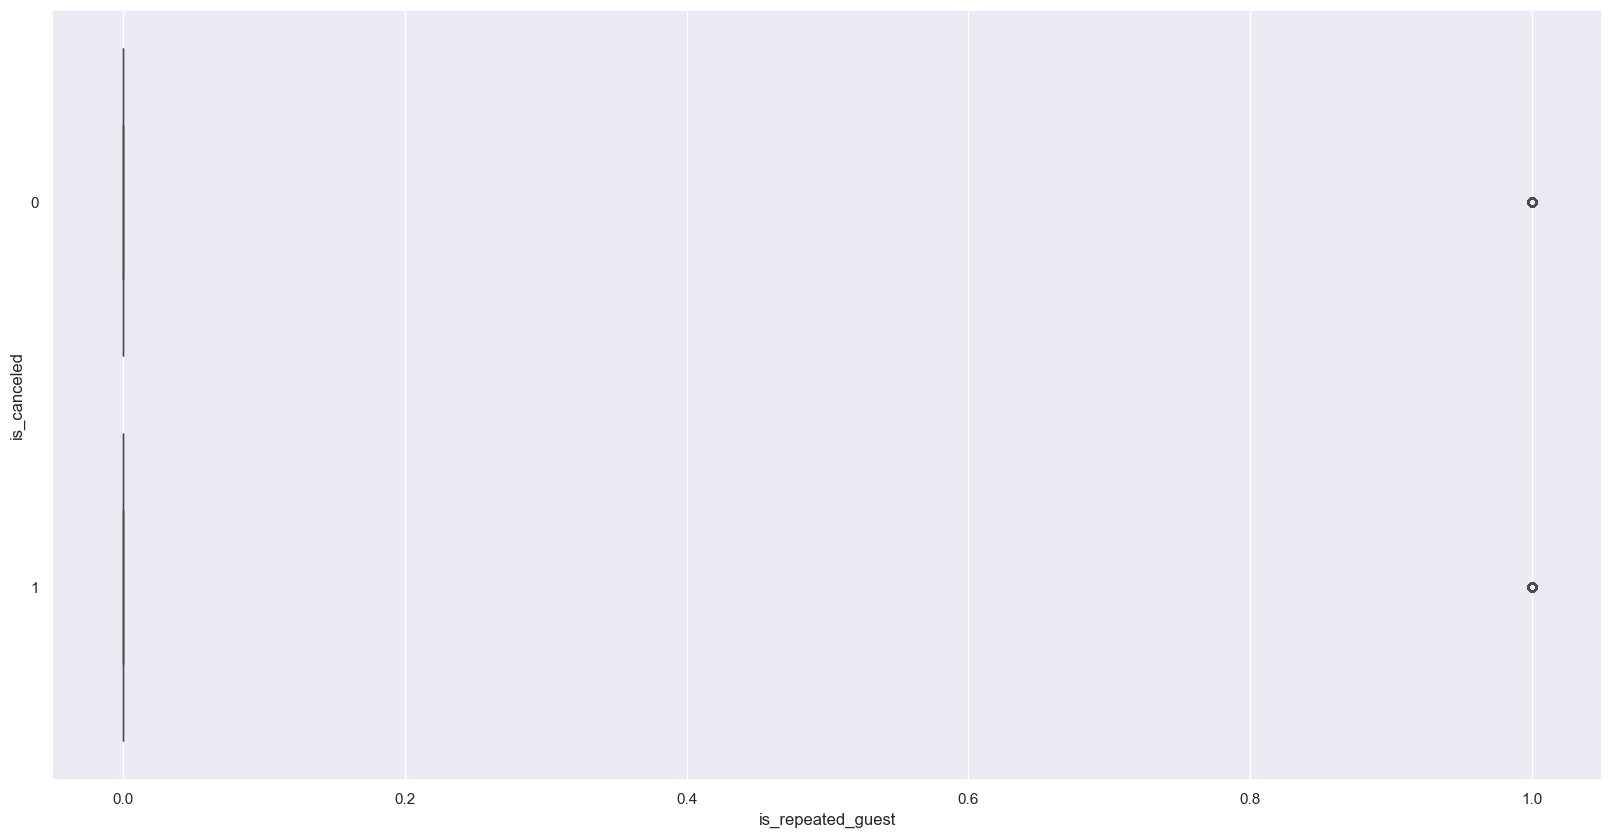

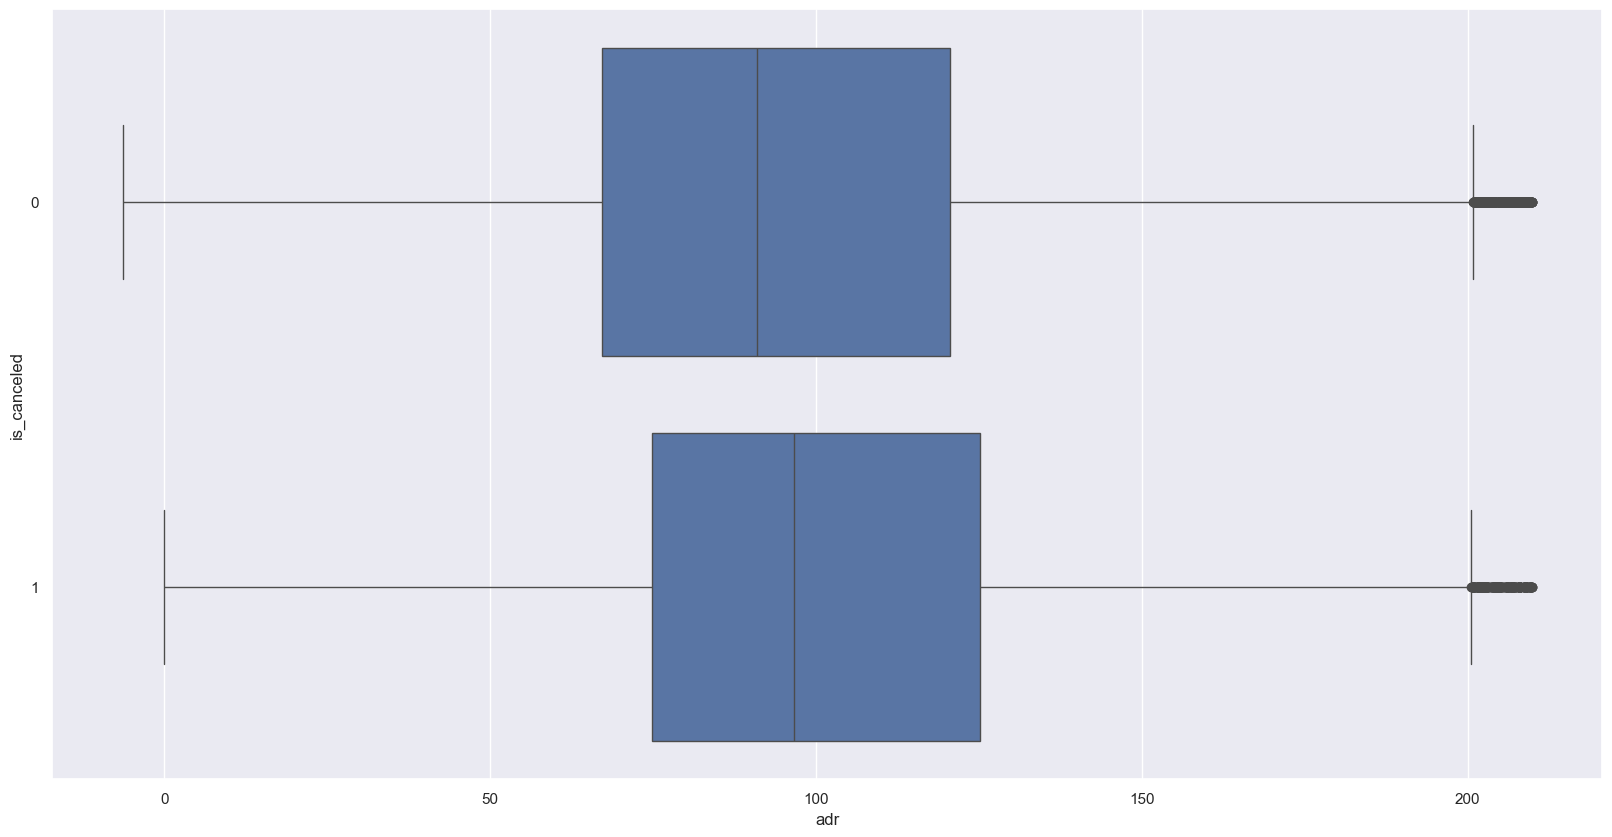

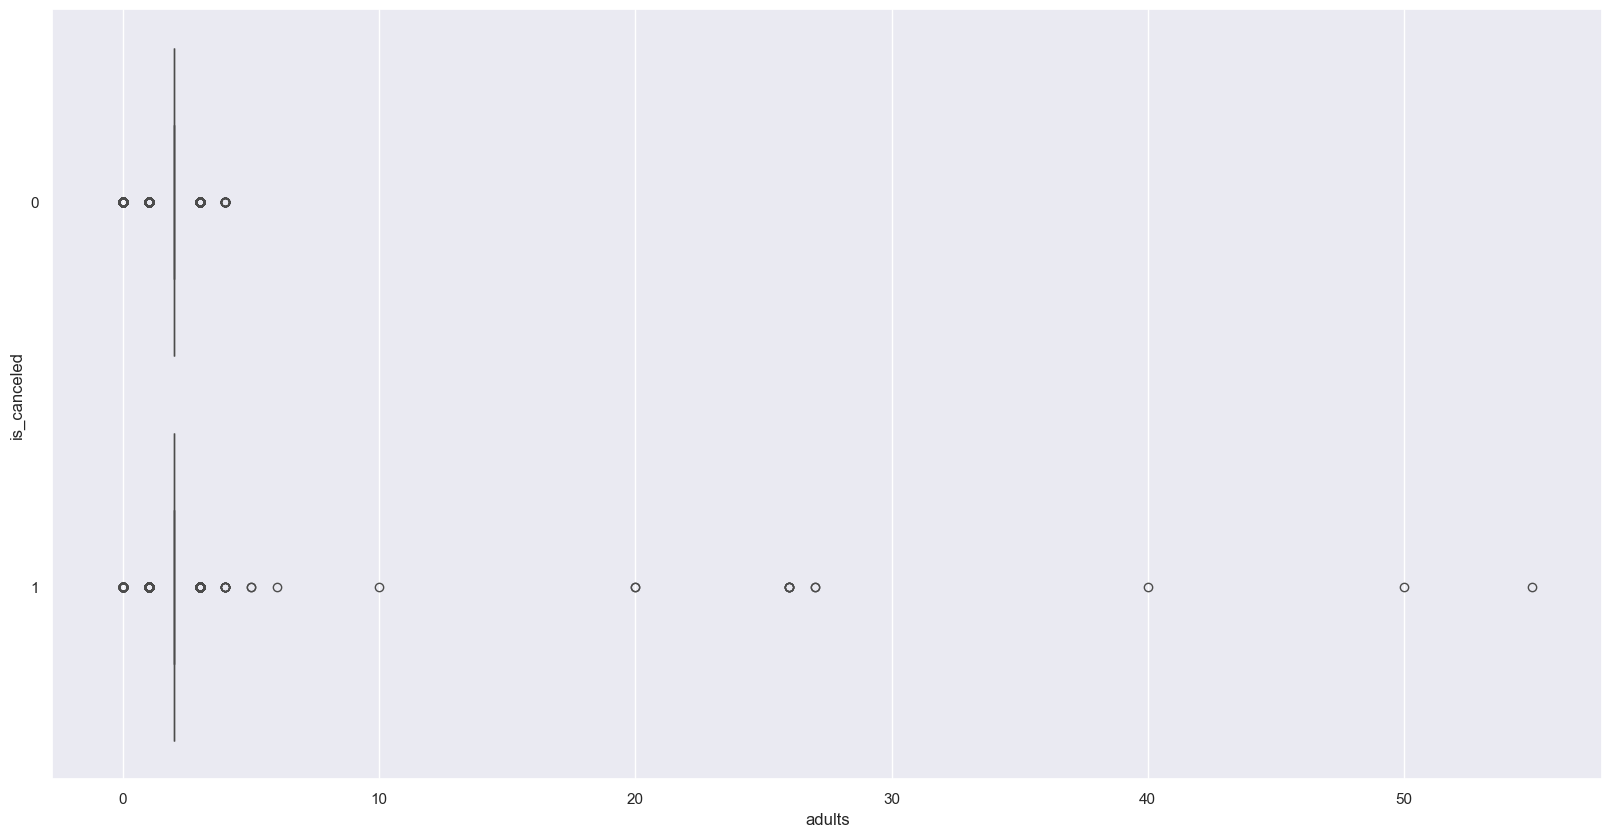

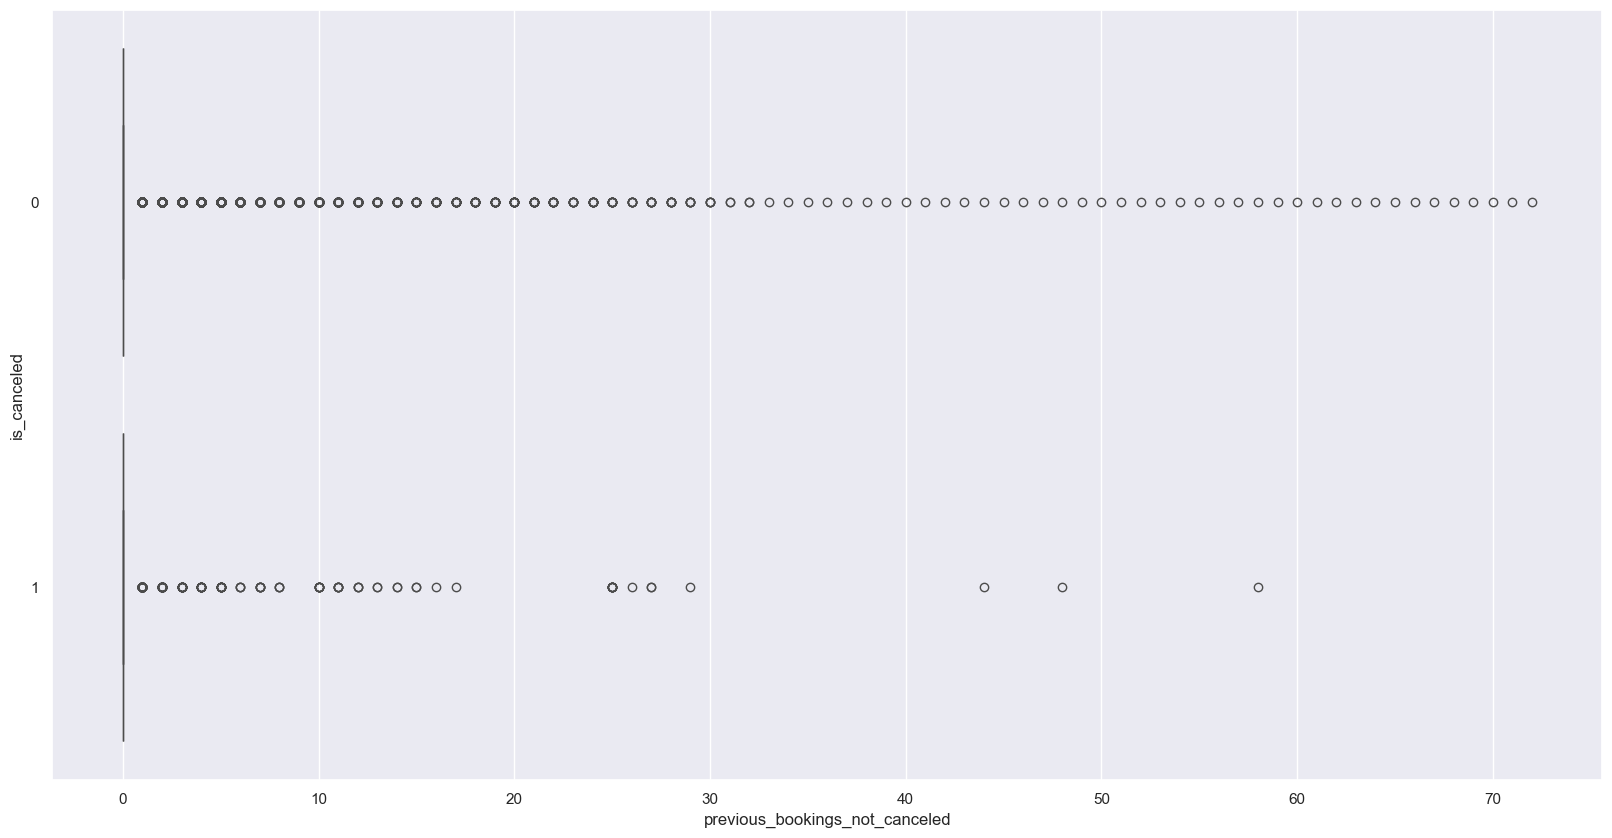

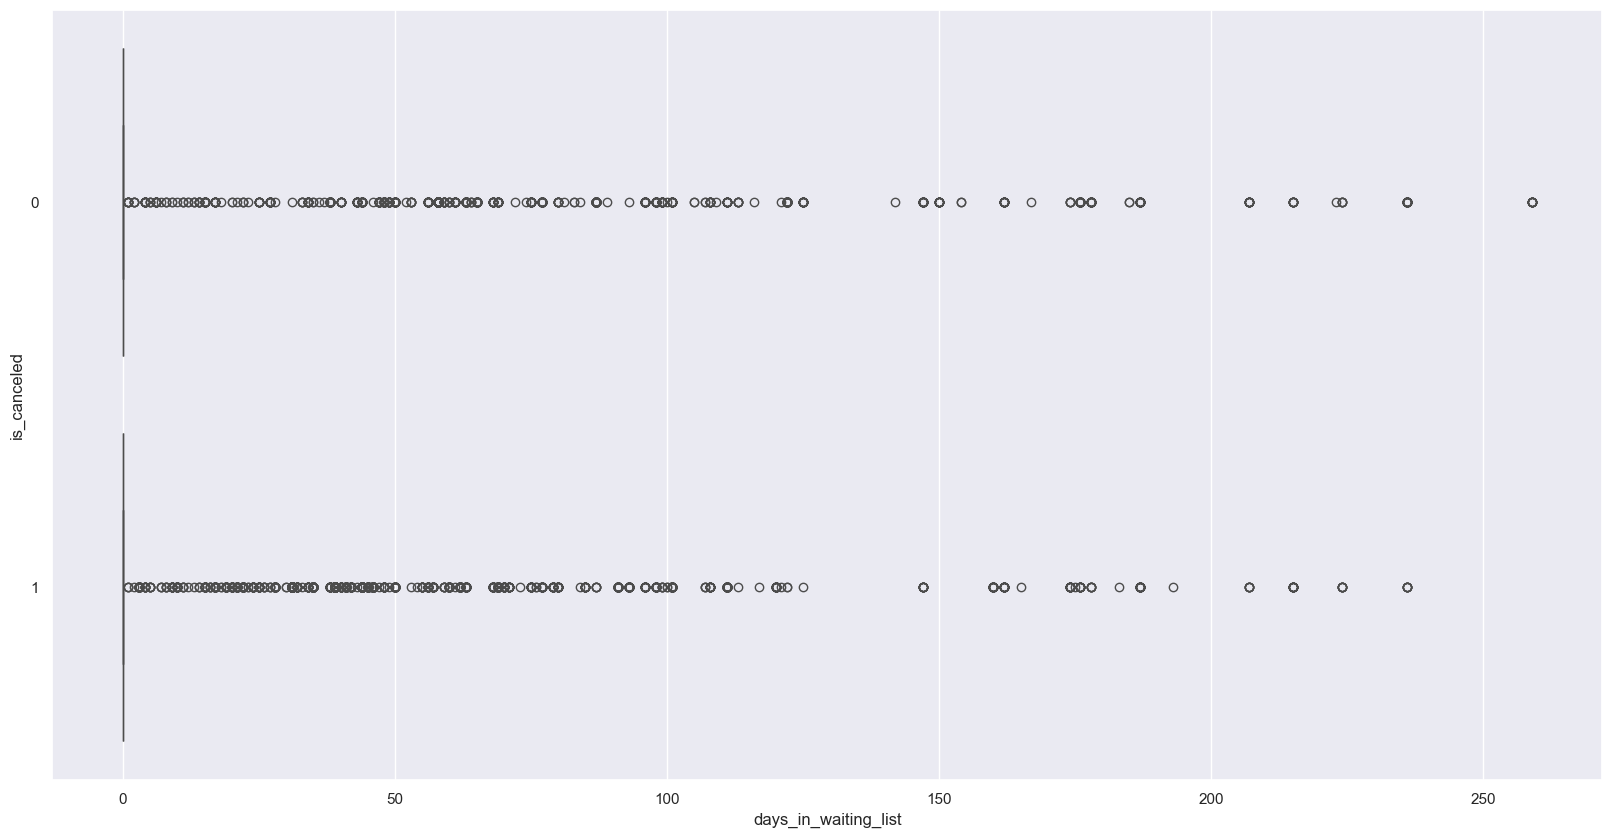

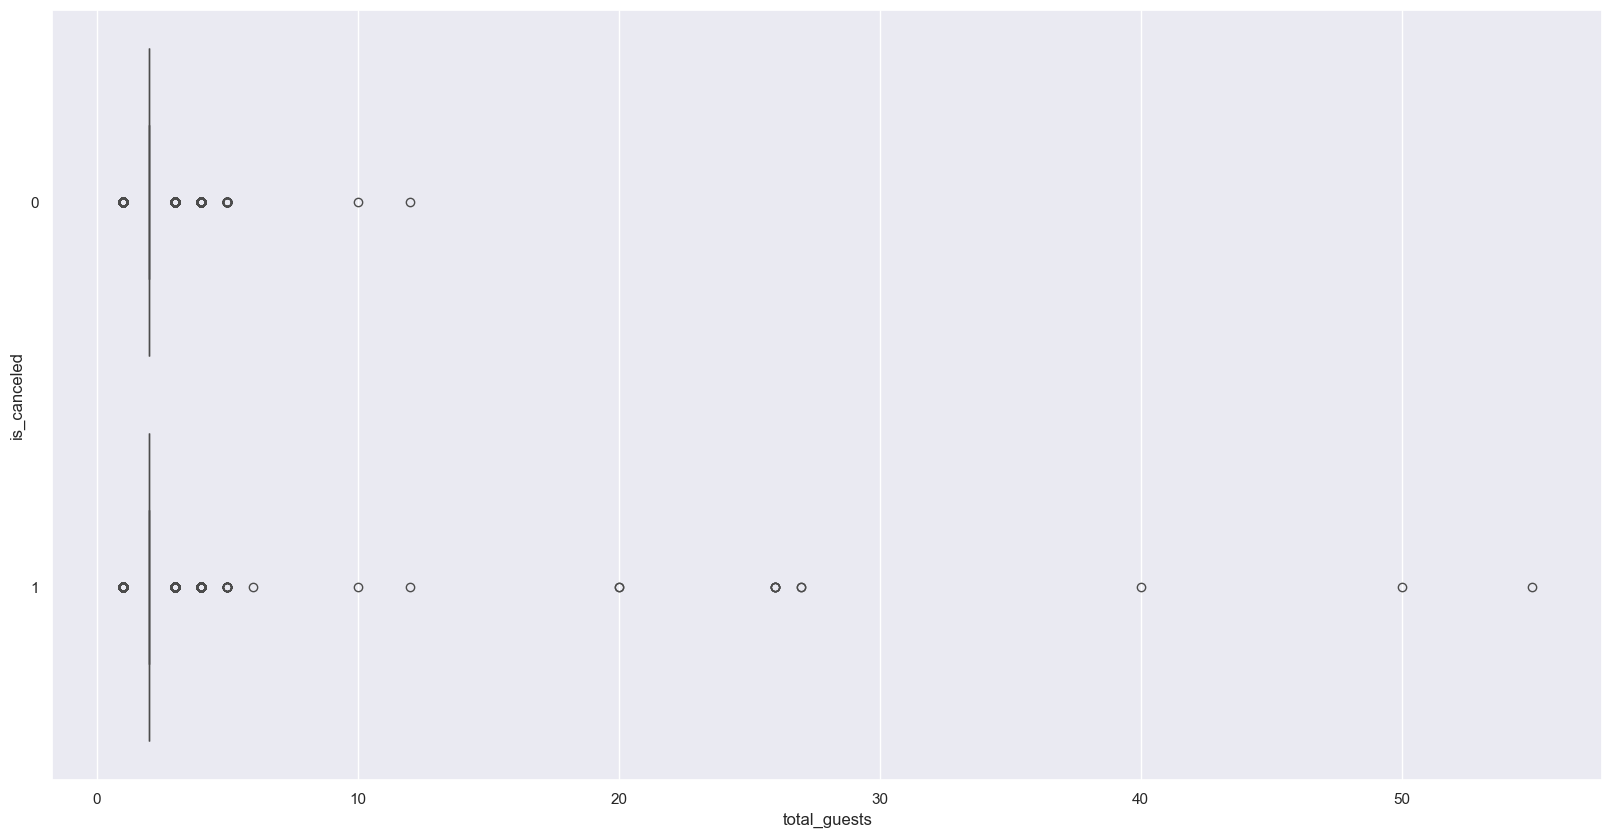

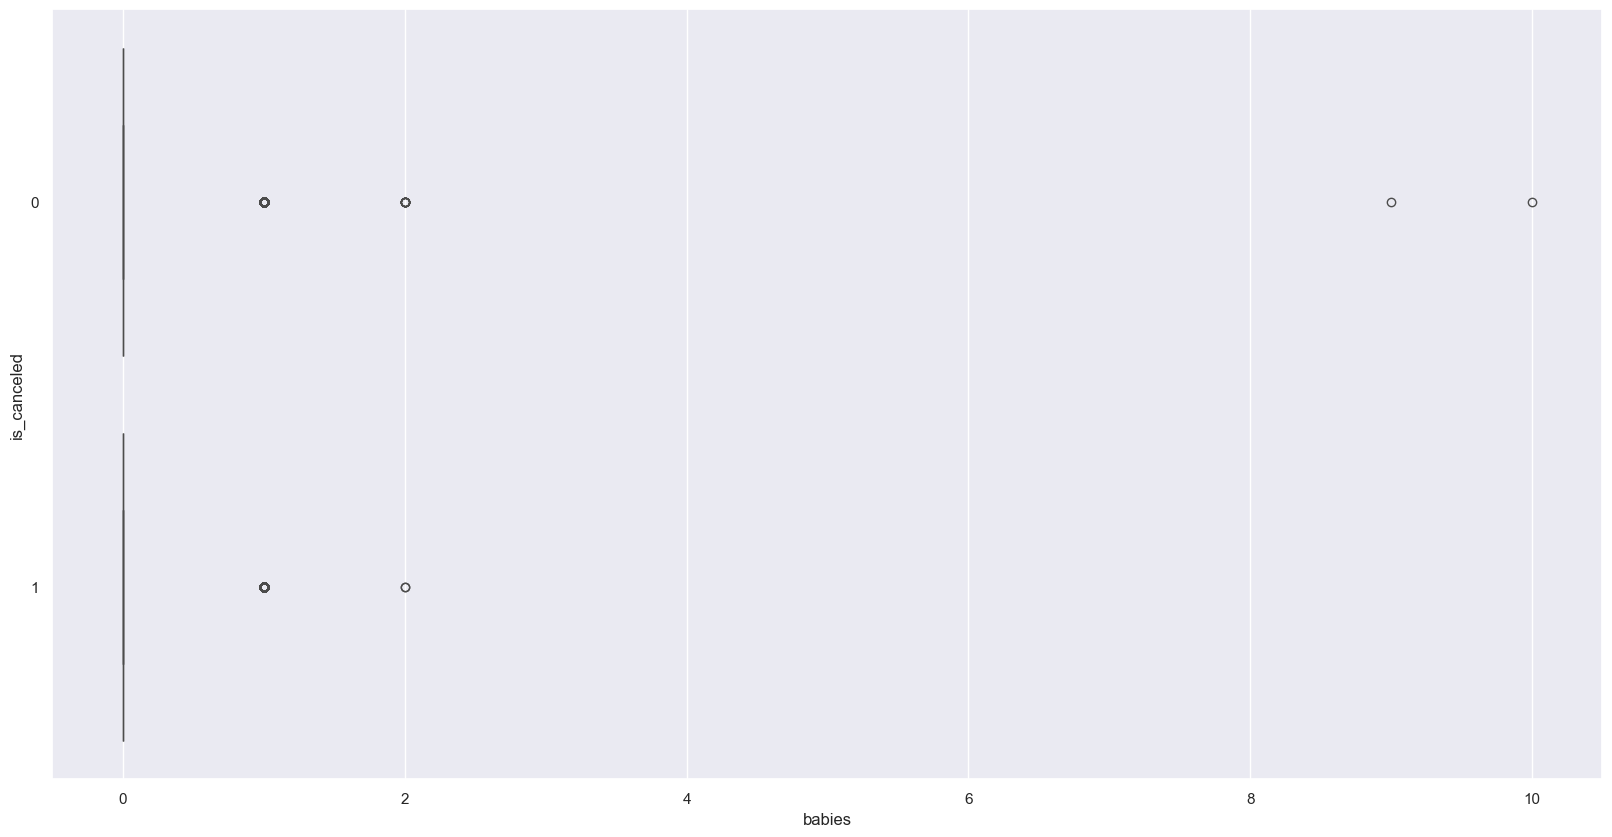

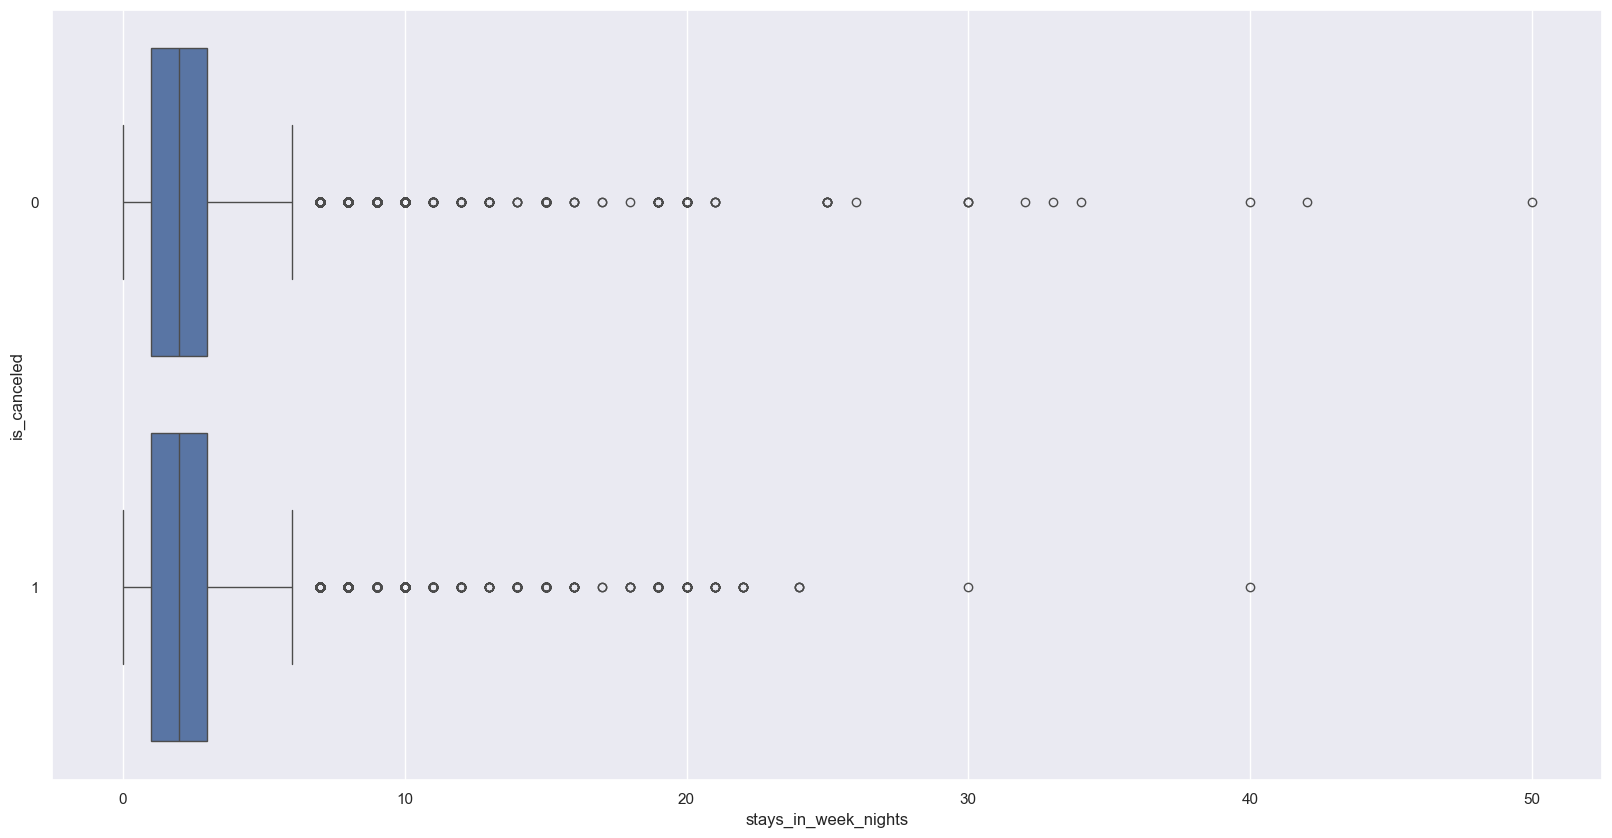

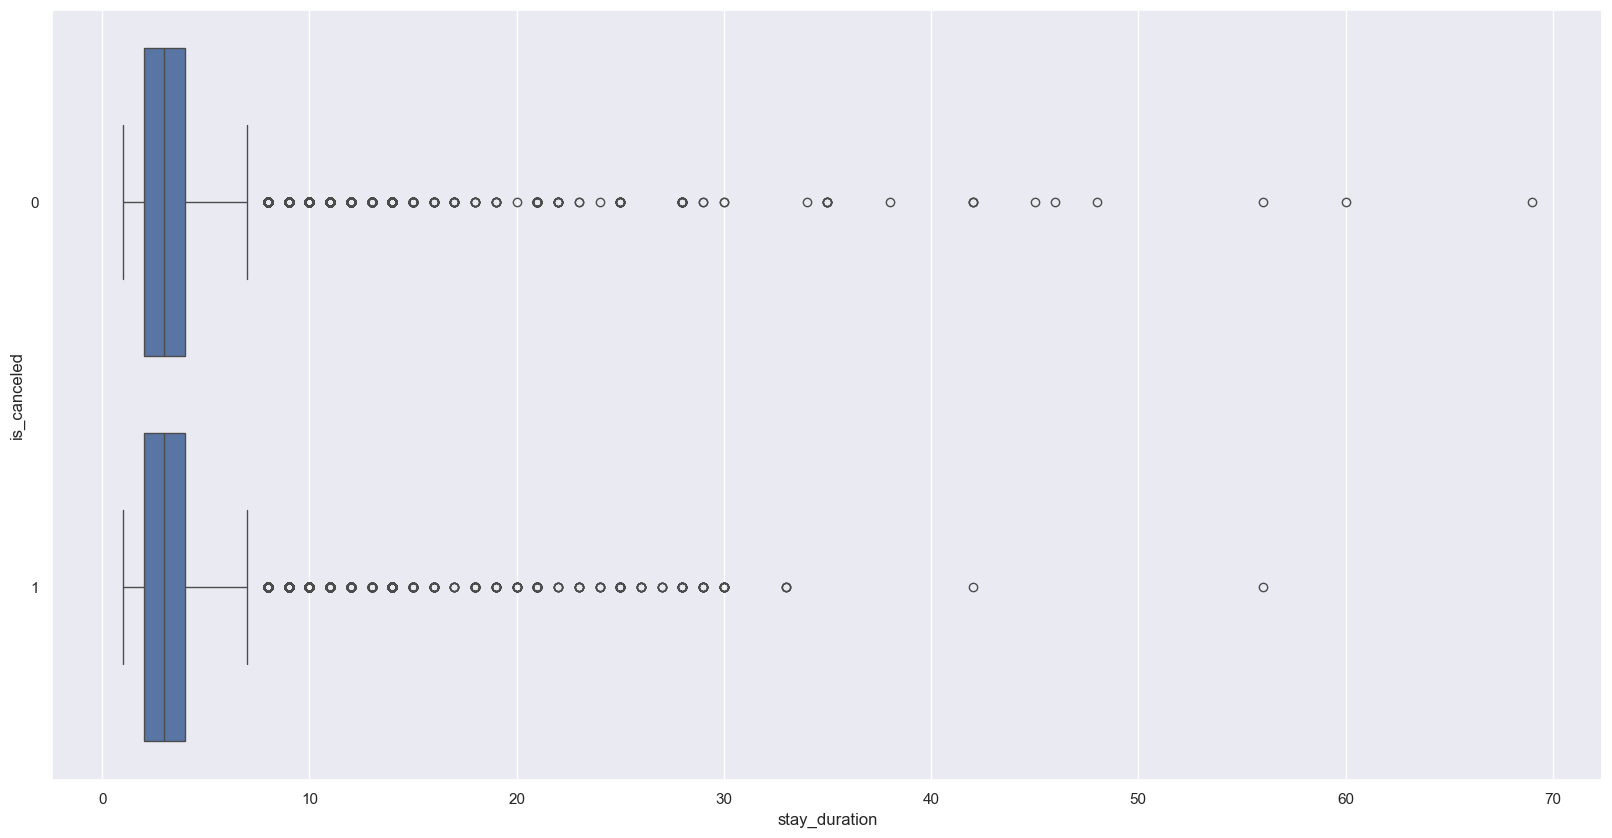

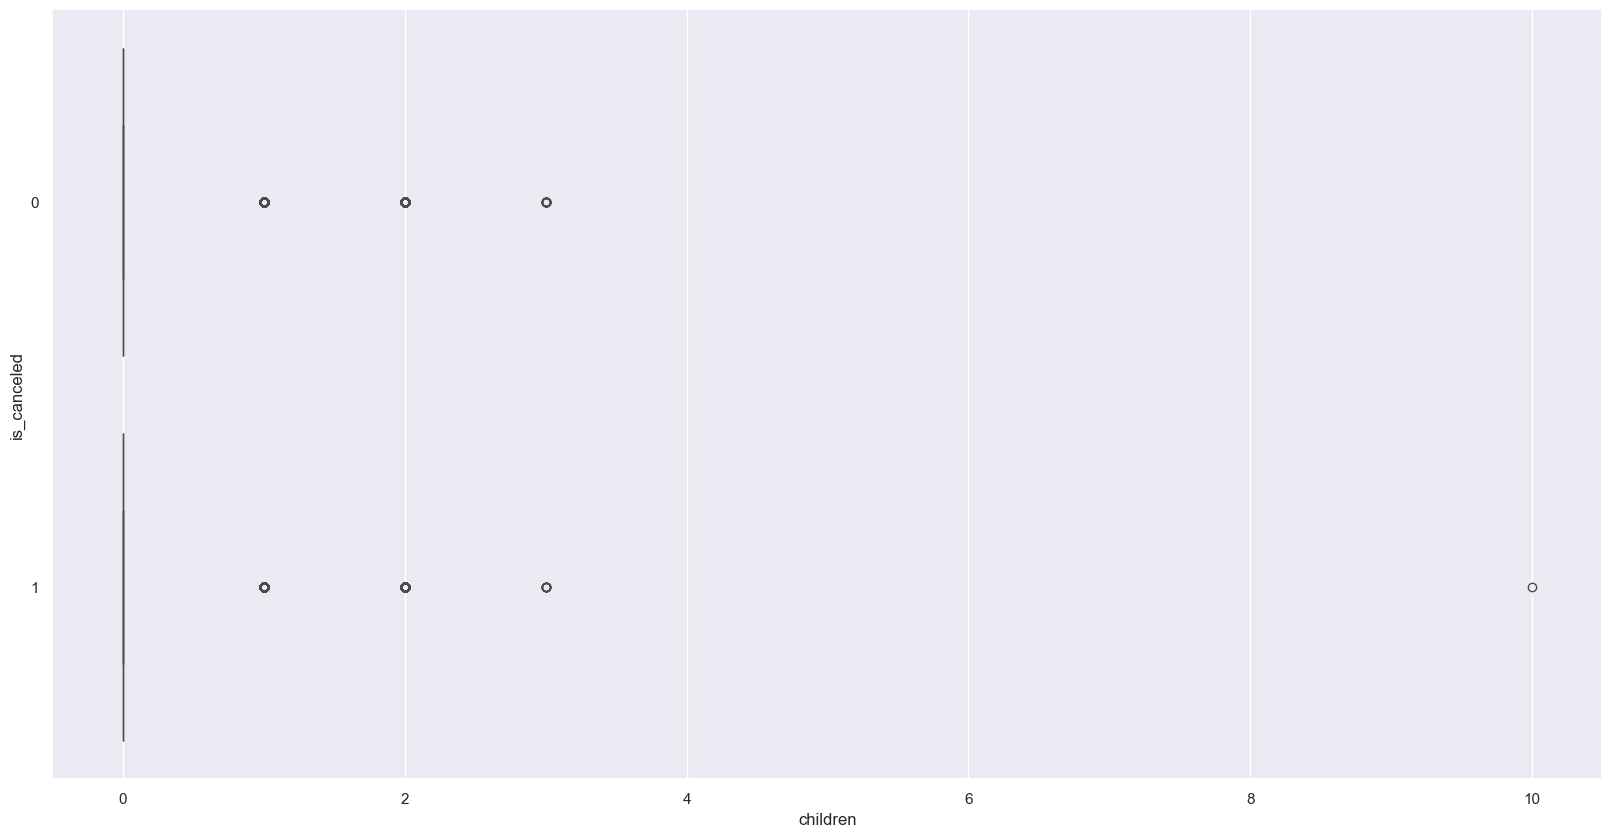

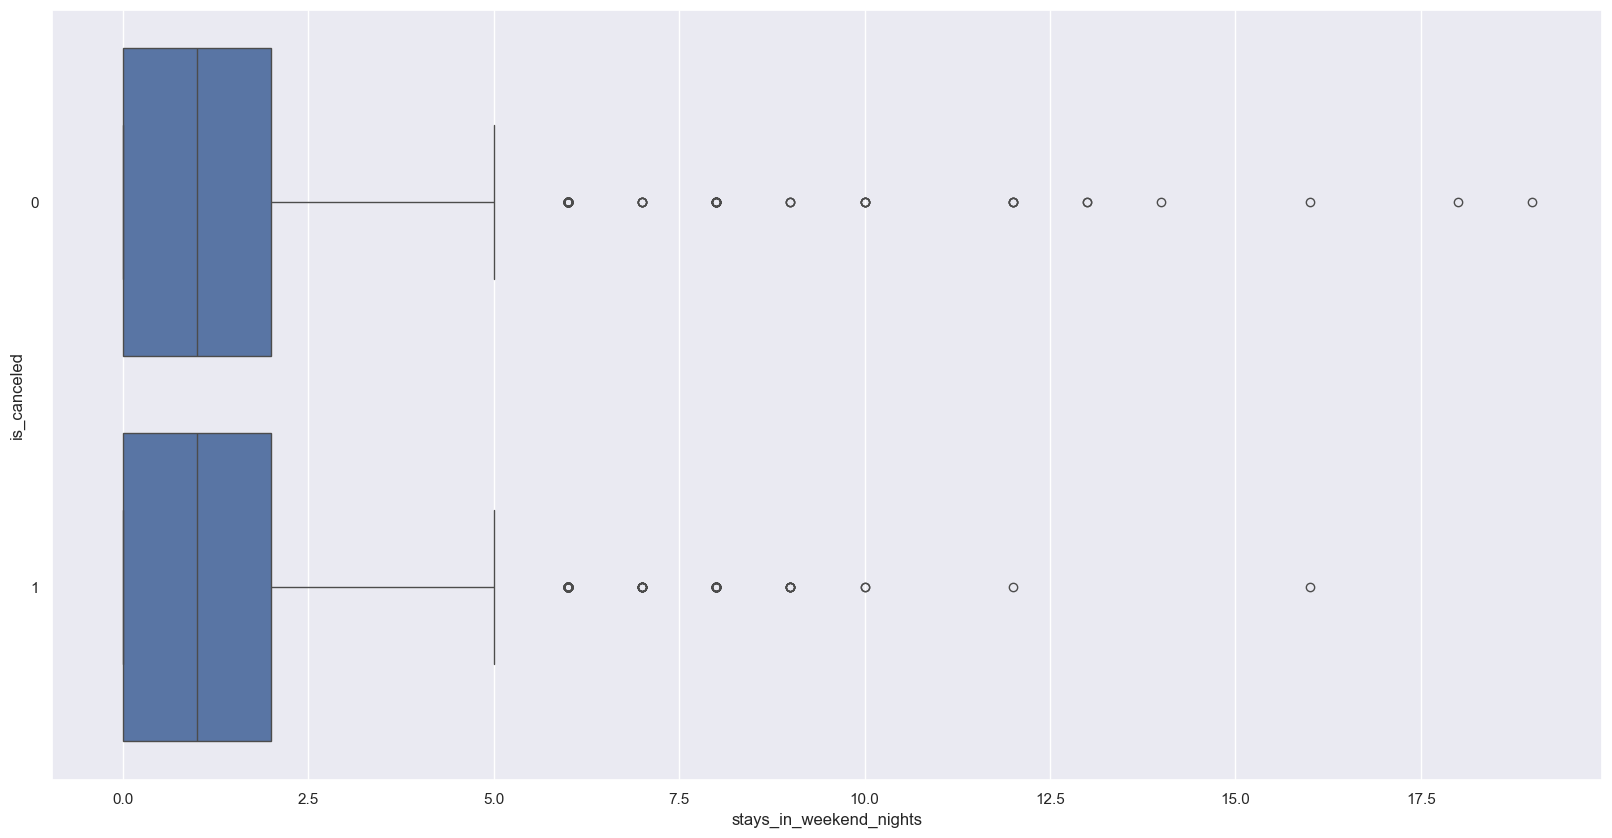

In [244]:
for i in sorted_numerical_cols:
    plt.figure(figsize = (20,10))
    sb.boxplot(y='is_canceled', x=i, data=data , orient = "h")
    



To identify potential patterns, we visualize how each categorical variable relates to booking cancellations (`is_canceled`).


We use bar charts to visualize most of the categorical variables 

In [272]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

to_remove = ['country', 'customer_type' , 'deposit_type','agent','company']
filtered_columns = [col for col in categorical_cols if col not in to_remove]




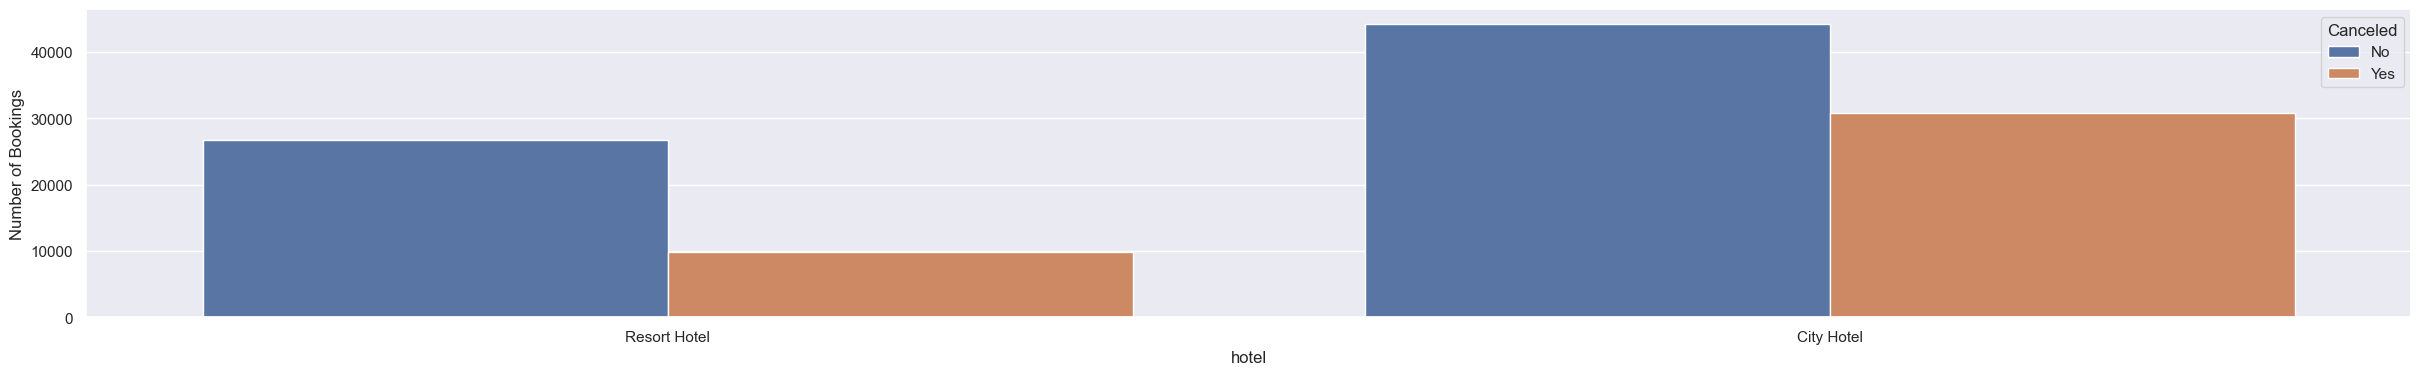

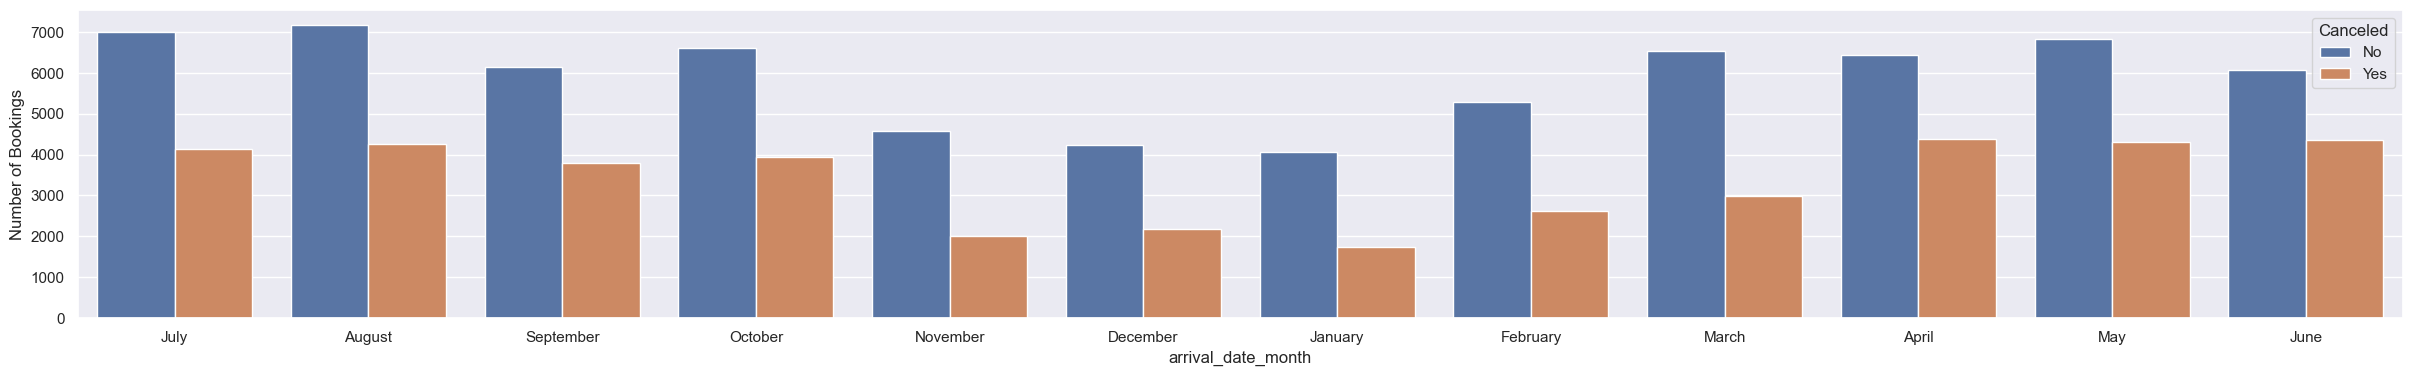

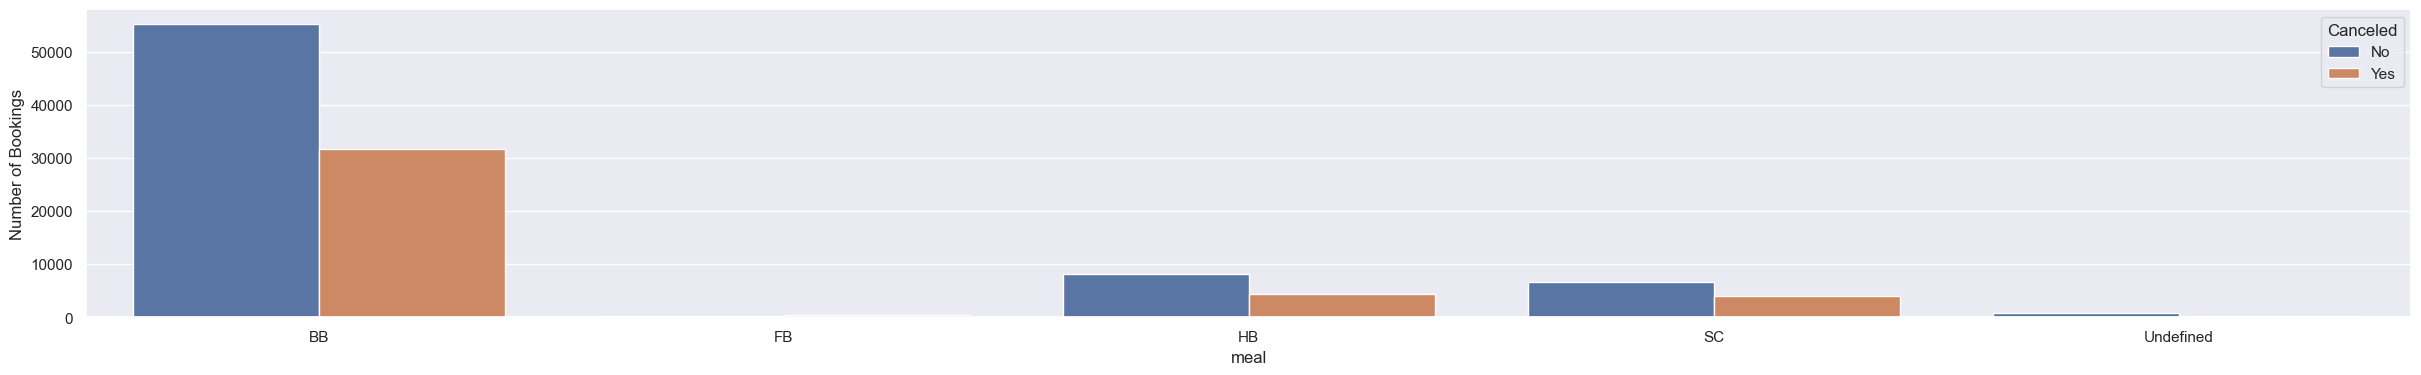

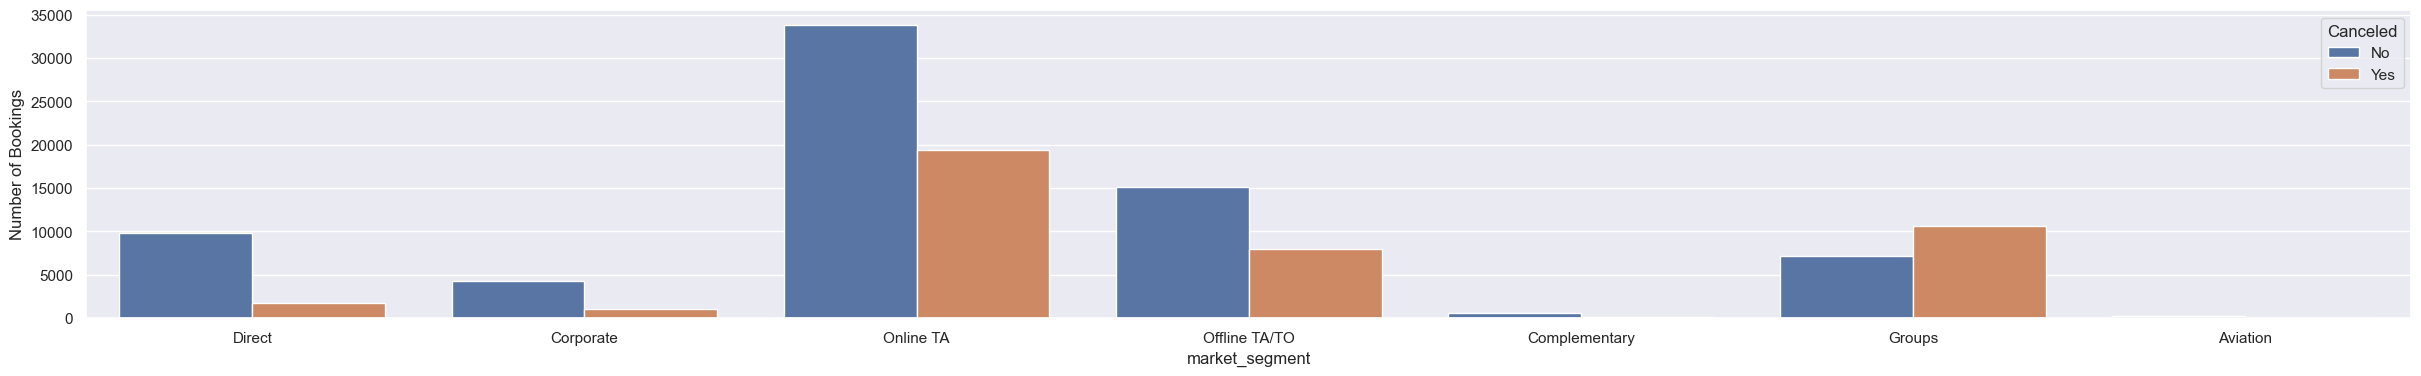

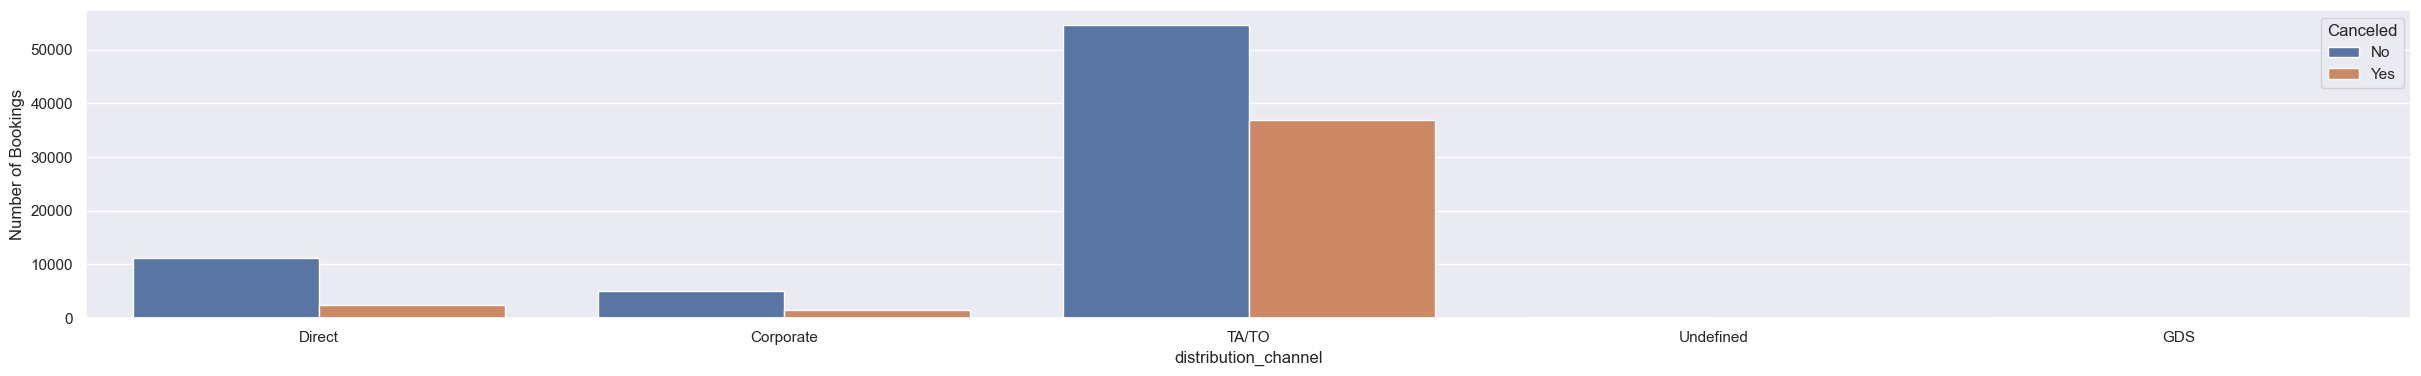

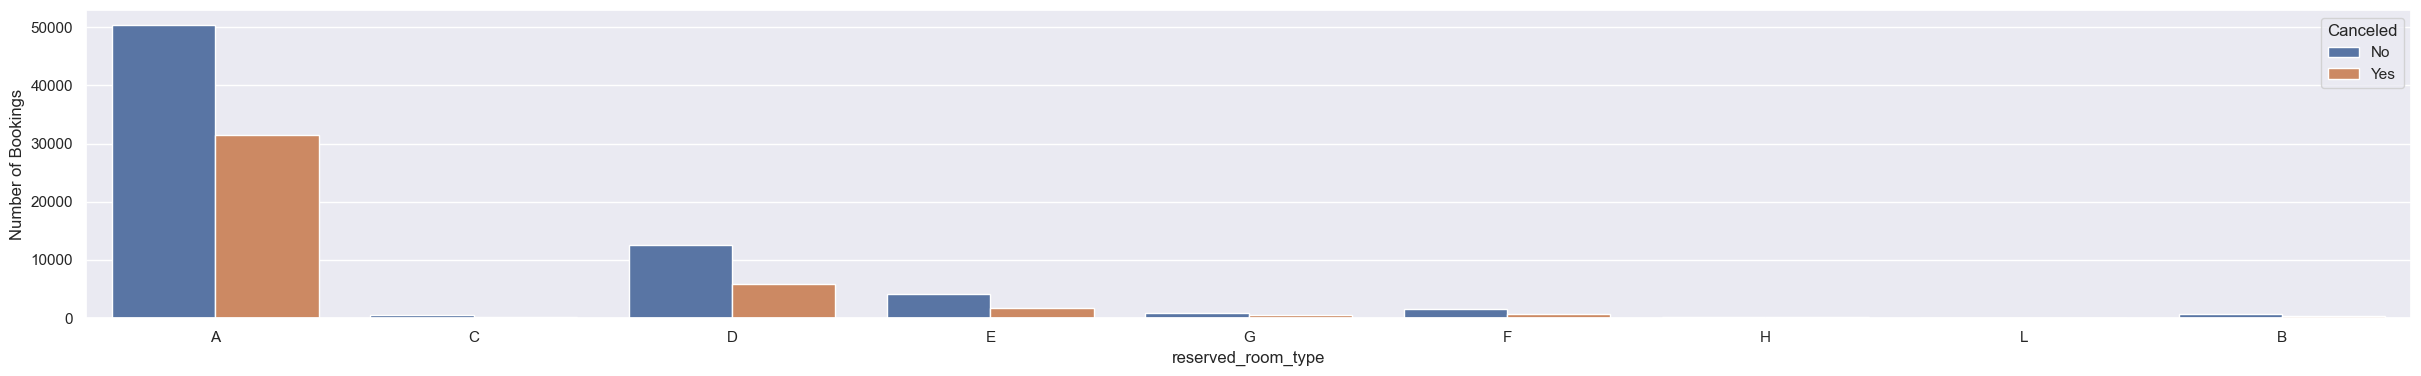

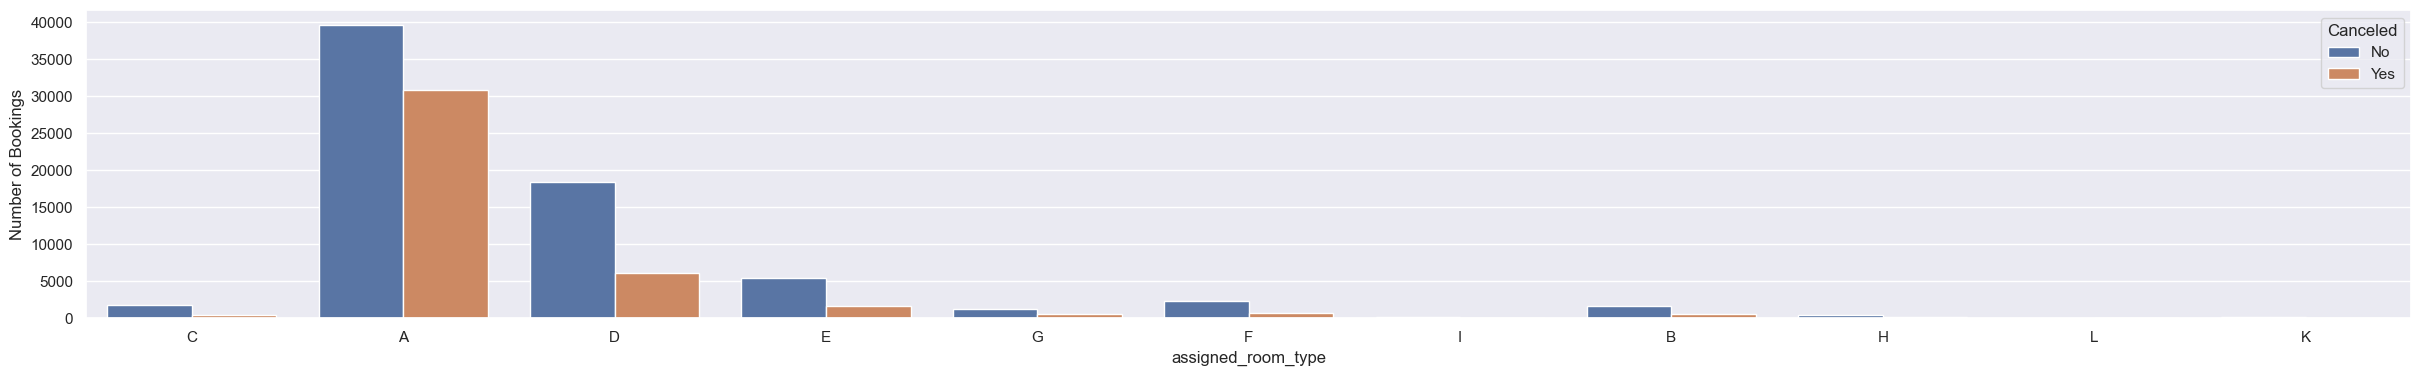

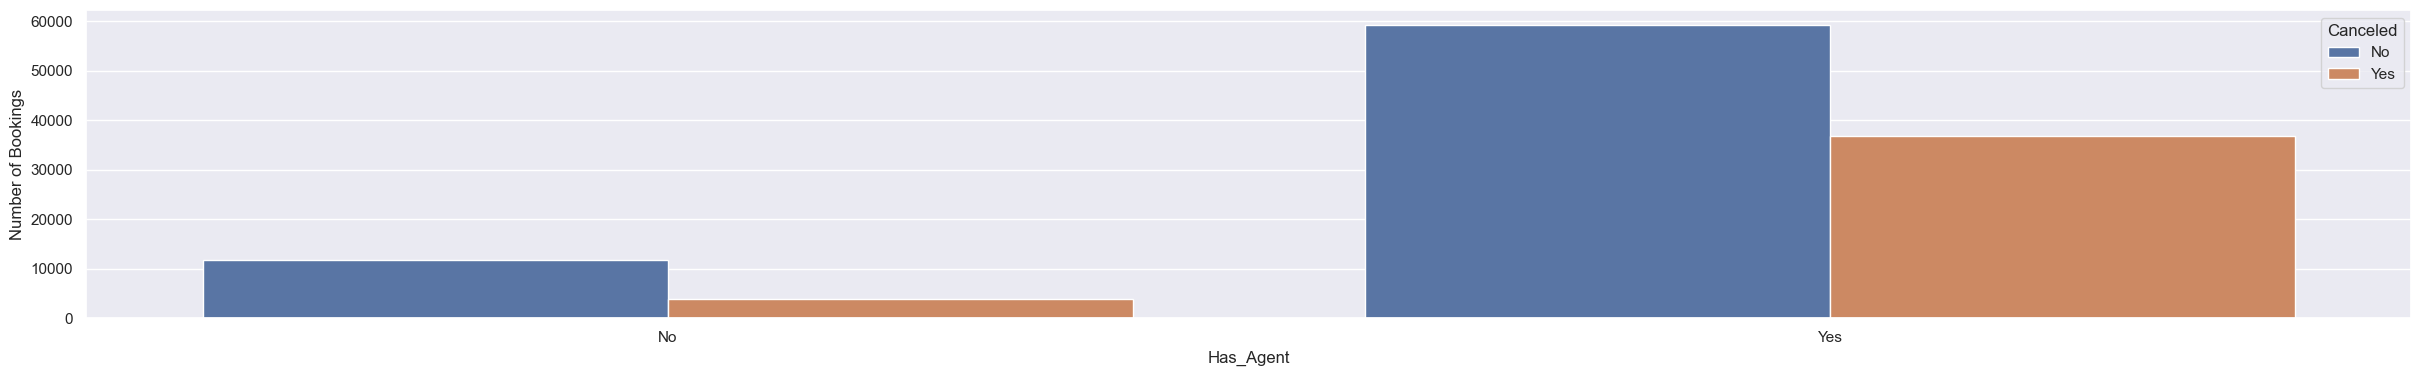

In [248]:


for i in filtered_columns:
    plt.figure(figsize = (30,4))
    sb.countplot(x=i, hue='is_canceled', data=data)
    plt.xlabel(i)
    plt.ylabel("Number of Bookings")
    plt.legend(title="Canceled", labels=["No", "Yes"])
    plt.show()
    

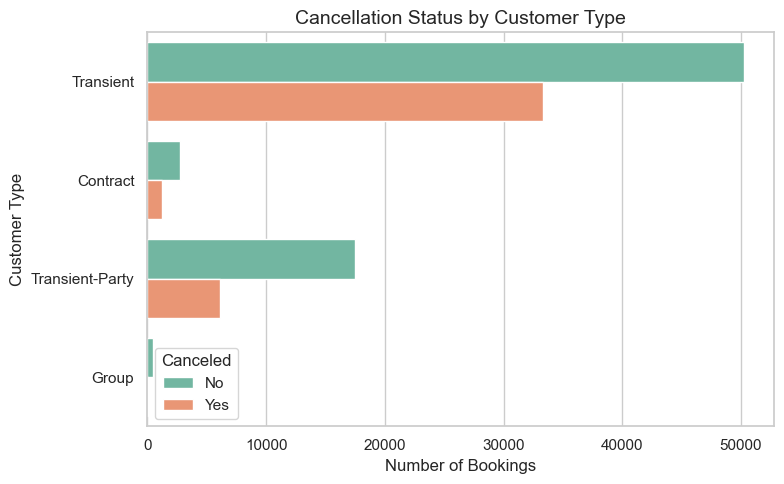

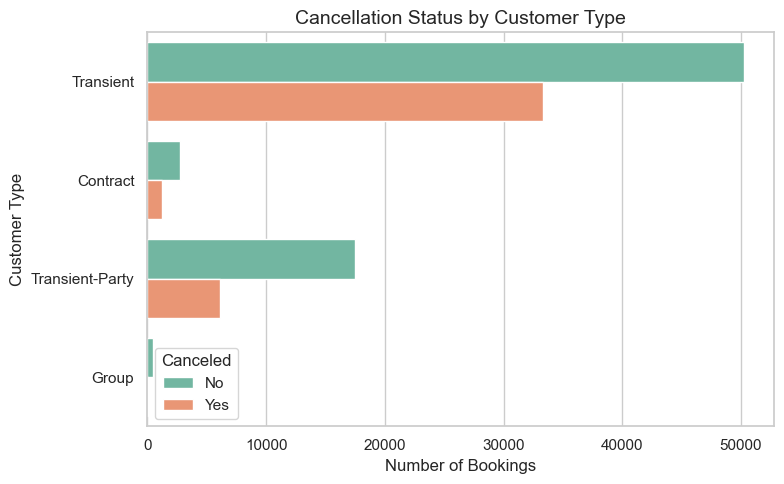

In [250]:


sb.set(style="whitegrid")


fig, ax = plt.subplots(figsize=(8, 5))


sb.countplot(
    y='customer_type',
    hue='is_canceled',
    data=data,
    ax=ax,
    palette='Set2'
)
ax.set_title('Cancellation Status by Customer Type', fontsize=14)
ax.set_xlabel('Number of Bookings')
ax.set_ylabel('Customer Type')
ax.legend(title='Canceled', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


sb.set(style="whitegrid")


fig, ax = plt.subplots(figsize=(8, 5))


sb.countplot(
    y='customer_type',
    hue='is_canceled',
    data=data,
    ax=ax,
    palette='Set2'
)
ax.set_title('Cancellation Status by Customer Type', fontsize=14)
ax.set_xlabel('Number of Bookings')
ax.set_ylabel('Customer Type')
ax.legend(title='Canceled', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


We have used a pie chart to visualize "Distribution of Deposit types"

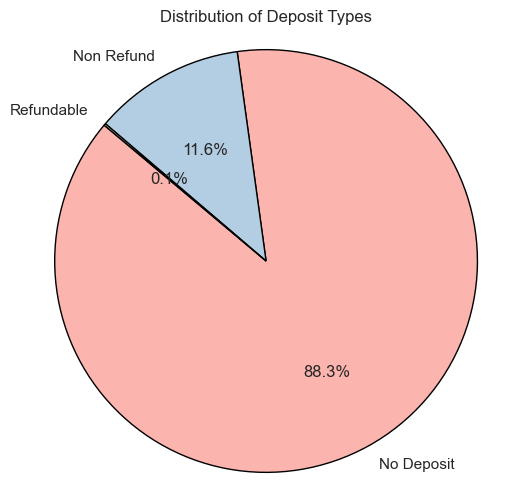

In [253]:



deposit_counts = data['deposit_type'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    deposit_counts,
    labels=deposit_counts.index,
    autopct='%1.1f%%',
    colors=sb.color_palette('Pastel1'),
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Deposit Types')
plt.axis('equal')
plt.show()

We have used a choropleth map to depict Hotel Booking Cancellation Rate by Country

In [255]:
import pandas as pd
import plotly.express as px




cancellation_stats = data.groupby('country')['is_canceled'].agg(
    total_bookings='count',
    total_cancellations='sum'
).reset_index()


cancellation_stats['cancellation_rate'] = (
    cancellation_stats['total_cancellations'] / cancellation_stats['total_bookings']
)


all_iso_codes = set(px.data.gapminder()['iso_alpha'].unique())
present_iso_codes = set(cancellation_stats['country'].unique())
missing_countries = list(all_iso_codes - present_iso_codes)

missing_data = pd.DataFrame({
    'country': missing_countries,
    'total_bookings': 0,
    'total_cancellations': 0,
    'cancellation_rate': None
})

full_cancellation_stats = pd.concat([cancellation_stats, missing_data], ignore_index=True)
valid_stats = full_cancellation_stats[full_cancellation_stats['country'].notna()]


fig = px.choropleth(
    valid_stats,
    locations='country',
    locationmode='ISO-3',
    color='cancellation_rate',
    color_continuous_scale='Reds',
    title='Hotel Booking Cancellation Rate by Country',
    labels={'cancellation_rate': 'Cancellation Rate'}
)


fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(
    geo=dict(bgcolor='lightyellow'),
    coloraxis_colorbar=dict(tickformat=".0%")
)

fig.show()

/var/folders/gw/xz2jm74n1337w_0m1gxvz2gh0000gn/T/ipykernel_34269/4220621354.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



## Why Country Was Not Selected as a Feature for Model Training

Although the choropleth map shows interesting patterns in cancellation rates across countries, we chose not to include `country` as a feature in our predictive model for the following reasons:

- **High Cardinality**: The `country` column contains over 170 unique values, which would require extensive encoding and could introduce unnecessary complexity.
- **Low Predictive Power**: Country-level trends may reflect broader regional booking behavior but are unlikely to be strong individual predictors of a specific booking's cancellation.
- **Potential for Overfitting**: Including a highly granular feature like `country` could lead to overfitting, especially if some countries have very few bookings in the dataset.
- **Data Sparsity**: Many countries have limited data points, which can negatively affect the model’s ability to generalize.




## Correlation of Categorical Variables with `is_canceled`

To evaluate the association between each categorical variable and the target variable `is_canceled`, we use **Cramér's V**.  
Cramér's V is a statistical measure that indicates the strength of association between two categorical variables. It ranges from **0 (no association)** to **1 (perfect association)**.

Below, we calculate and display the Cramér's V score for each categorical feature, sorted in descending order of association strength.


In [259]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """Calculate Cramer's V (association strength between two categorical variables)."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()


cramers_v_scores = {}

for col in categorical_cols:
    confusion_matrix = pd.crosstab(data[col], data['is_canceled'])
    score = cramers_v(confusion_matrix)
    cramers_v_scores[col] = score


cramers_v_sorted = pd.Series(cramers_v_scores).sort_values(ascending=False)
print("Coerralation of categorical Variables with 'is_cancelled'")
print()
print(cramers_v_sorted)

Coerralation of categorical Variables with 'is_cancelled'

deposit_type            0.472156
agent                   0.376709
country                 0.358607
market_segment          0.255142
assigned_room_type      0.200957
distribution_channel    0.171346
company                 0.142737
hotel                   0.136757
customer_type           0.125814
Has_Agent               0.097748
arrival_date_month      0.074611
reserved_room_type      0.071304
meal                    0.053124
dtype: float64




We take note of 'deposit_type' ,'agent' and 'market_segment' as they show the highest correlation with `is_canceled`, excluding `country`.
